In [ ]:
import numpy as np
import pandas as pd
import sklearn.metrics as ms
import matplotlib.pyplot as plt
from tensorflow import keras 
from tensorflow.keras import layers

In [ ]:
# Load Data
 
mnist = keras.datasets.mnist
 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255, X_test/255

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# Build Model
 
i = keras.Input(shape=(28,28))
x = layers.Flatten()(i)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(.2)(x)
x = layers.Dense(10, activation="softmax")(x)
 
model = keras.Model(i, x)

In [ ]:
# Compile the Model
 
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train the Model
 
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4759 - accuracy: 0.8620 - val_loss: 0.1382 - val_accuracy: 0.9611
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1499 - accuracy: 0.9564 - val_loss: 0.1089 - val_accuracy: 0.9667
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1081 - accuracy: 0.9678 - val_loss: 0.0881 - val_accuracy: 0.9725
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0883 - accuracy: 0.9735 - val_loss: 0.0793 - val_accuracy: 0.9758
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0716 - accuracy: 0.9772 - val_loss: 0.0851 - val_accuracy: 0.9740
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0622 - accuracy: 0.9800 - val_loss: 0.0763 - val_accuracy: 0.9761
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0571 - accuracy: 0.9821 - val_loss: 0.0783 - val_accuracy:

In [ ]:
 model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0790 - accuracy: 0.9766


[0.07901598513126373, 0.9765999913215637]

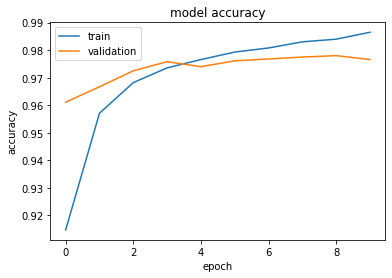

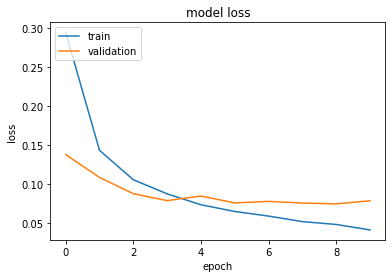

In [ ]:
#  "Accuracy"
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
metrix=ms.confusion_matrix(
y_test,
y_pred.argmax(axis=1)
)
 
metrix

array([[ 968,    0,    3,    1,    0,    1,    3,    3,    1,    0],
       [   0, 1124,    4,    0,    0,    0,    2,    2,    3,    0],
       [   5,    3, 1010,    1,    2,    0,    1,    8,    2,    0],
       [   0,    0,    6,  987,    0,    4,    0,    8,    3,    2],
       [   1,    0,    3,    1,  961,    0,    3,    3,    2,    8],
       [   2,    1,    0,   13,    3,  862,    4,    2,    3,    2],
       [   6,    3,    1,    1,    6,    4,  932,    2,    3,    0],
       [   1,    4,    6,    2,    0,    0,    0, 1013,    0,    2],
       [   5,    1,    4,    4,    6,    2,    1,    8,  939,    4],
       [   2,    5,    0,    7,   11,    3,    0,   10,    1,  970]])